In [9]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [4]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
def loss_fn(X, Y, w):
    return cp.pnorm(X @ w - Y, p=2)**2

def regularizer(w):
    return cp.pnorm(w, p=2)**2

def objective_fn(X, Y, w, lambd):
    return loss_fn(X, Y, w) + lambd * regularizer(w)

def mse(X, Y, w):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, w).value

In [7]:
m,n = X_train.shape

In [22]:
w = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X_train, y_train, w, lambd)))

lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors = []
w_values = []
for v in lambd_values:
    lambd.value = v
    problem.solve()
    train_errors.append(mse(X_train, y_train, w))
    test_errors.append(mse(X_test, y_test, w))
    w_values.append(w.value)

In [23]:
w.value

array([ 0.32740666,  0.01856001,  0.8779669 ,  0.65480503,  0.23031207,
        0.15764387, -0.5485401 ,  0.57657387,  0.7896676 ,  0.61970389])

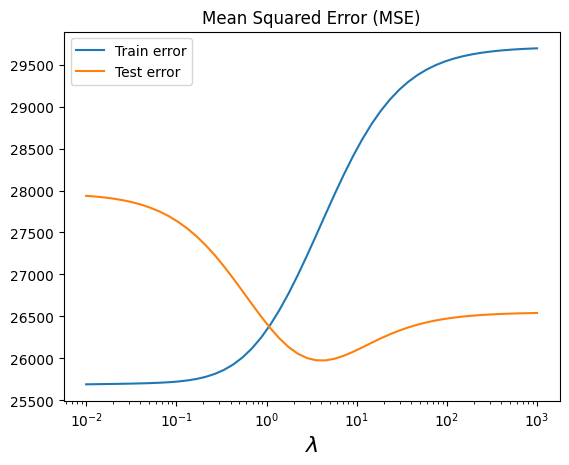

In [24]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):
    plt.plot(lambd_values, train_errors, label="Train error")
    plt.plot(lambd_values, test_errors, label="Test error")
    plt.xscale("log")
    plt.legend(loc="upper left")
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.title("Mean Squared Error (MSE)")
    plt.show()

plot_train_test_errors(train_errors, test_errors, lambd_values)

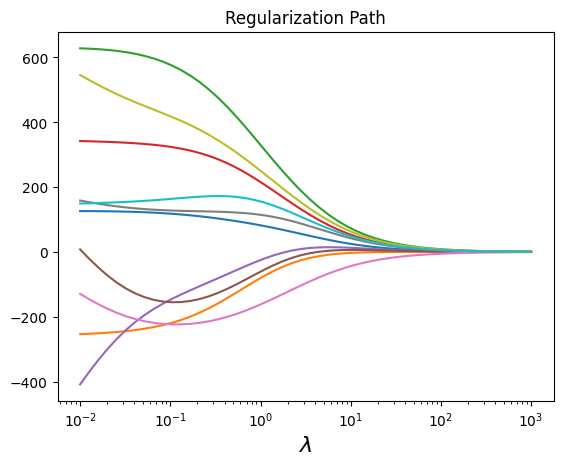

In [25]:
def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"$\lambda$", fontsize=16)
    plt.xscale("log")
    plt.title("Regularization Path")
    plt.show()

plot_regularization_path(lambd_values, w_values)